Parameter vor dem Verschieben:
m = -0.973
s = 1.31
y0 = 6.79e+03
Parameter nach dem Verschieben:
m = -2.32e-07
s = 1.31
y0 = 6.79e+03


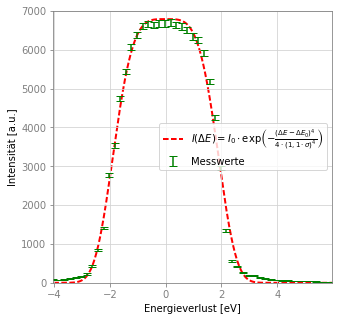

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

data = pd.read_csv('data/ZLP@511,511.tsv', delimiter='\t')

data.Y0 = data.Y0 / 7.33

from scipy.optimize import curve_fit

gauss = lambda x, m, s, y0: y0*np.exp(-(x-m)**4/(4*(1.1*s)**4))

popt,pcov = curve_fit(gauss,
                      data.X0,
                      data.Y0,
                      p0=[0, 1.4, data.Y0.max()]
                     )
print('Parameter vor dem Verschieben:\nm = {:.3g}\ns = {:.3g}\ny0 = {:.3g}'.format(*popt))

# ZLP auf 0eV verschieben:
data.X0 = data.X0 - popt[0]
popt,pcov = curve_fit(gauss,
                      data.X0,
                      data.Y0,
                      p0=[0, 1.4, data.Y0.max()]
                     )
print('Parameter nach dem Verschieben:\nm = {:.3g}\ns = {:.3g}\ny0 = {:.3g}'.format(*popt))

xs = np.linspace(data.X0.min(), data.X0.max(), 1000)
ys = [gauss(x + popt[0], popt[0], popt[1], popt[2]) for x in xs]

plt.figure(figsize=(5, 5))
plt.xlabel('Energieverlust [eV]')
plt.ylabel('Intensität [a.u.]')
plt.xlim(data.X0.min(), data.X0.max())
plt.ylim(0, 7000)

plt.plot(xs,
         ys,
         zorder=-1,
         c='r',
         ls='dashed',
         lw=2,
         label=r'$I(\Delta E)=I_0\cdot\exp\left(-\frac{(\Delta E - \Delta E_0)^4}{4\cdot (1,1\cdot\sigma)^4}\right)$'
        )
plt.errorbar(data.X0,
             data.Y0,
             yerr=np.sqrt(data.Y0),
             c='g',
             linestyle='',
             capsize=4,
             capthick=1,
             label='Messwerte'
            )
plt.legend(loc='best')
plt.savefig('Bilder/NIC-ZLP')